In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

array = []
for i in range(1, 32):
    day = pd.read_csv('nyt/nyt' + str(i) + '.csv')
    day['Day'] = i
    array.append(day)
data_from_array = pd.concat(array)
data = data_from_array.copy()
data

,Age,Gender,Impressions,Clicks,Signed_In,Day
0,36,0.0,3.0,0.0,1.0,1
1,73,1.0,3.0,0.0,1.0,1
2,30,0.0,3.0,0.0,1.0,1
3,49,1.0,3.0,0.0,1.0,1
4,47,1.0,11.0,0.0,1.0,1
...,...,...,...,...,...,...
293121,37,0.0,5.0,0.0,1.0,31
293122,23,1.0,3.0,0.0,1.0,31
293123,0,0.0,4.0,0.0,0.0,31
293124,0,0.0,4.0,1.0,0.0,31


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8994028 entries, 0 to 293125
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Age          int64  
 1   Gender       float64
 2   Impressions  float64
 3   Clicks       float64
 4   Signed_In    float64
 5   Day          int64  
dtypes: float64(4), int64(2)
memory usage: 480.3 MB


In [6]:
datainfo = np.sort(data.Age.unique())
datainfo

array([  0,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 111, 112, 113, 115], dtype=int64)

In [7]:
data.groupby("Age").count()

,Gender,Impressions,Clicks,Signed_In,Day
Age,,,,,
0,3336478,3336477,3336474,3336472,3336480
3,2,2,2,2,2
4,1,1,1,1,2
5,5,5,5,5,6
6,27,27,27,27,28
...,...,...,...,...,...
108,2,2,2,2,2
111,3,3,3,3,3
112,1,1,1,1,1


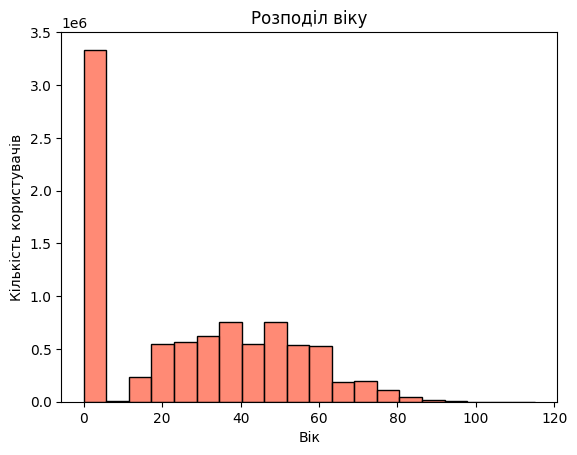

In [8]:
sns.histplot(data.Age, bins=20, kde=False, color='tomato')

plt.title('Розподіл віку')
plt.xlabel('Вік')
plt.ylabel('Кількість користувачів')
plt.show()

In [9]:
#Завдання 1
bins = [0, 1, 18, 25, 35, 45, 55, 65, float('inf')]  # Границі вікових груп
labels = ['N', '<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']  # Позначення вікових груп

data.loc[:, 'age_group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
data_signed_in = data[(data.Age>0)&(data.Signed_In == 1)]
data_unsigned_in = data[(data.Age == 0)&(data.Signed_In != 1)]
data_signed_in[['Age', 'Day', 'age_group']].head(60)

,Age,Day,age_group
0,36,1,35-44
1,73,1,65+
2,30,1,25-34
3,49,1,45-54
4,47,1,45-54
5,47,1,45-54
7,46,1,45-54
8,16,1,<18
9,52,1,45-54
11,21,1,18-24


In [10]:
data_unsigned_in[['Age', 'Day', 'age_group']].head(60)

,Age,Day,age_group
6,0,1,N
10,0,1,N
12,0,1,N
15,0,1,N
19,0,1,N
24,0,1,N
39,0,1,N
41,0,1,N
46,0,1,N
47,0,1,N


In [11]:
#Завдання 2
ctr_data_upgraded = data.groupby("age_group", observed=False).sum()
ctr_data_upgraded["CTR"]=ctr_data_upgraded.Clicks/ctr_data_upgraded.Impressions
ctr_data_upgraded

,Age,Gender,Impressions,Clicks,Signed_In,Day,CTR
age_group,,,,,,,
N,0,0.0,16687945.0,473027.0,0.0,55217541,0.028345
<18,3741641,167303.0,1226334.0,36869.0,245170.0,3539866,0.030064
18-24,14931087,377365.0,3581244.0,39826.0,716344.0,10346497,0.011121
25-34,30066892,537510.0,5094729.0,51059.0,1019265.0,14698518,0.010022
35-44,49149275,656567.0,6216218.0,62470.0,1244278.0,18003039,0.010050
45-54,56010399,596111.0,5656448.0,56800.0,1131599.0,16350525,0.010042
55-64,47026428,416367.0,3950100.0,78901.0,790372.0,11425744,0.019974
65+,37260660,183703.0,2553355.0,76459.0,510503.0,7374797,0.029945


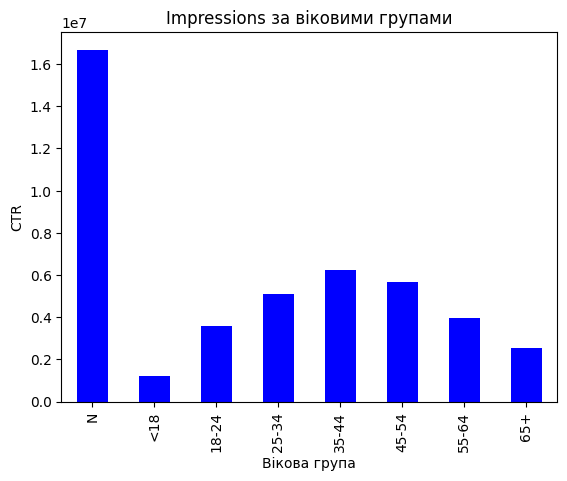

In [12]:
ctr_data_upgraded.Impressions.plot(kind="bar", color='b')
plt.title('Impressions за віковими групами')
plt.xlabel('Вікова група')
plt.ylabel('CTR')
plt.show()

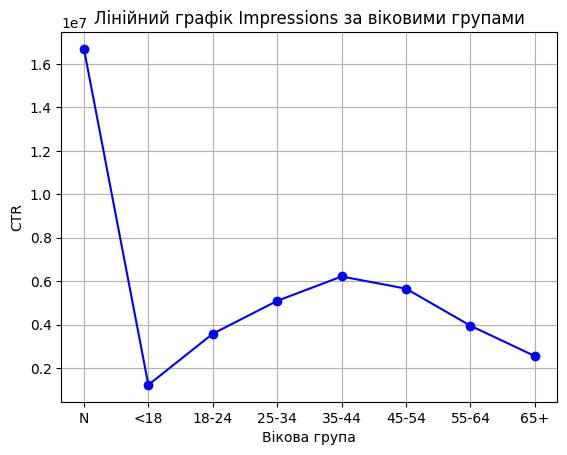

In [13]:
ctr_data_upgraded.Impressions.plot(kind="line", marker='o', linestyle='-', color='b')
plt.title('Лінійний графік Impressions за віковими групами')
plt.xlabel('Вікова група')
plt.ylabel('CTR')
plt.grid(True)
plt.show()

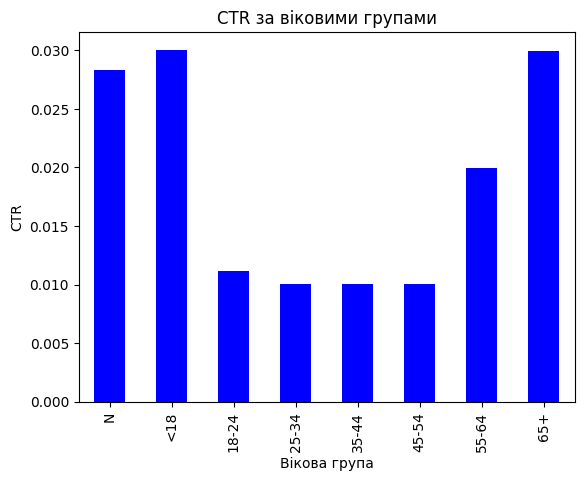

In [14]:
#
ctr_data_upgraded.CTR.plot(kind="bar", color='b')
plt.title('CTR за віковими групами')
plt.xlabel('Вікова група')
plt.ylabel('CTR')
plt.show()

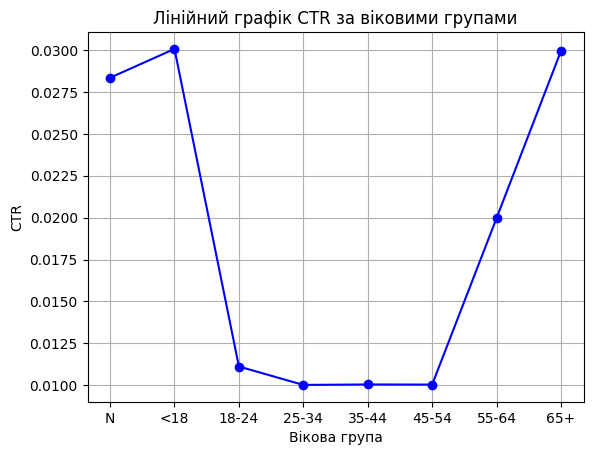

In [15]:
ctr_data_upgraded.CTR.plot(kind="line", marker='o', linestyle='-', color='b')
plt.title('Лінійний графік CTR за віковими групами')
plt.xlabel('Вікова група')
plt.ylabel('CTR')
plt.grid(True)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_6848\3575558283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_signed_in['CTR']=data_signed_in.Clicks/data_signed_in.Impressions
C:\Users\admin\AppData\Local\Temp\ipykernel_6848\3575558283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unsigned_in['CTR']=data_unsigned_in.Clicks/data_unsigned_in.Impressions


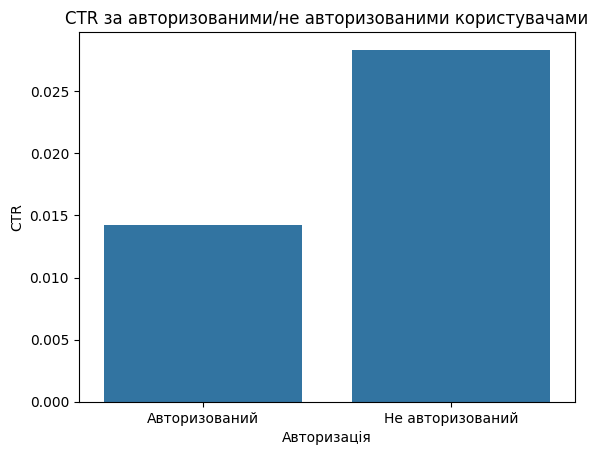

In [27]:
data_signed_in['CTR']=data_signed_in.Clicks/data_signed_in.Impressions
data_unsigned_in['CTR']=data_unsigned_in.Clicks/data_unsigned_in.Impressions
sns.barplot(x=['Авторизований', 'Не авторизований'], y=[data_signed_in['CTR'].mean(), data_unsigned_in['CTR'].mean()])
plt.title('CTR за авторизованими/не авторизованими користувачами')
plt.xlabel('Авторизація')
plt.ylabel('CTR')
plt.show()

In [28]:
#Завдання 3
numeric_columns = data_signed_in.select_dtypes(include='number').columns
analysis_result = data_signed_in.groupby("Gender")[numeric_columns].sum()
analysis_result['CTR'] = analysis_result['Clicks'] / analysis_result['Impressions']
analysis_result

,Age,Gender,Impressions,Clicks,Signed_In,Day,CTR
Gender,,,,,,,
0.0,118311793,0.0,13611105.0,197828.0,2722609.0,39423664,0.014534
1.0,119873978,2934922.0,14667301.0,204556.0,2934922.0,42315030,0.013946


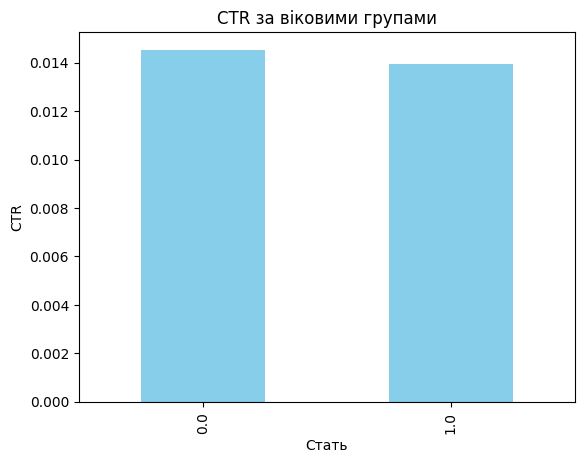

In [29]:
analysis_result.CTR.plot(kind="bar", color='skyblue')
plt.title('CTR за віковими групами')
plt.xlabel('Стать')
plt.ylabel('CTR')
plt.show()

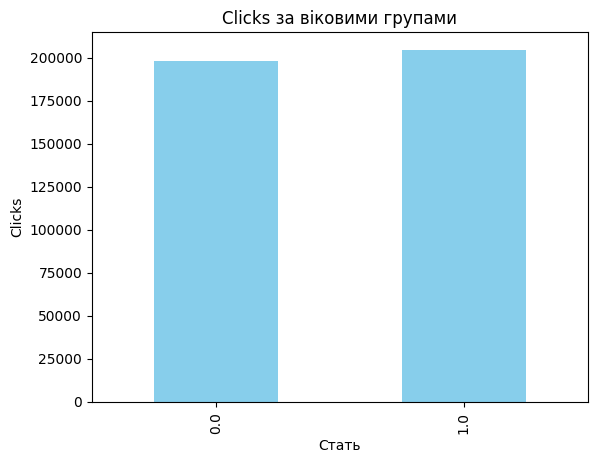

In [30]:
analysis_result.Clicks.plot(kind="bar", color='skyblue')
plt.title('Clicks за віковими групами')
plt.xlabel('Стать')
plt.ylabel('Clicks')
plt.show()

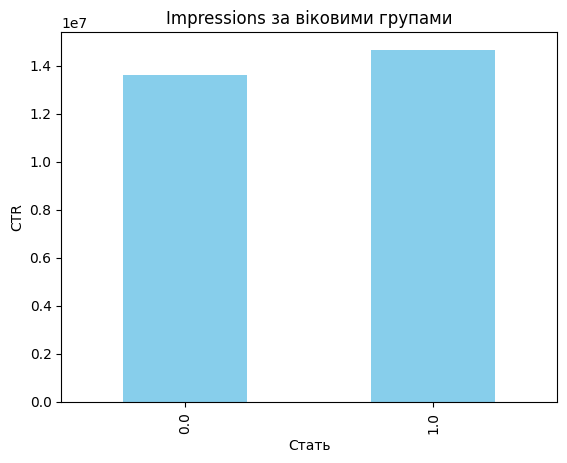

In [31]:
analysis_result.Impressions.plot(kind="bar", color='skyblue')
plt.title('Impressions за віковими групами')
plt.xlabel('Стать')
plt.ylabel('CTR')
plt.show()

In [32]:
days_signed = data_signed_in.groupby(['age_group', 'Gender']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()
days_signed['CTR'] = days_signed['Clicks'] / days_signed['Impressions']

days_signed

C:\Users\admin\AppData\Local\Temp\ipykernel_6848\2597202971.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_signed = data_signed_in.groupby(['age_group', 'Gender']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()


,age_group,Gender,Impressions,Clicks,CTR
0,N,0.0,0.0,0.0,NaN
1,N,1.0,0.0,0.0,NaN
2,<18,0.0,390005.0,11734.0,0.030087
3,<18,1.0,836322.0,25135.0,0.030054
4,18-24,0.0,1695298.0,18816.0,0.011099
5,18-24,1.0,1885939.0,21010.0,0.011140
6,25-34,0.0,2407834.0,24326.0,0.010103
7,25-34,1.0,2686895.0,26733.0,0.009949
8,35-44,0.0,2937061.0,29662.0,0.010099
9,35-44,1.0,3279154.0,32808.0,0.010005


Text(0, 0.5, 'Impressions')

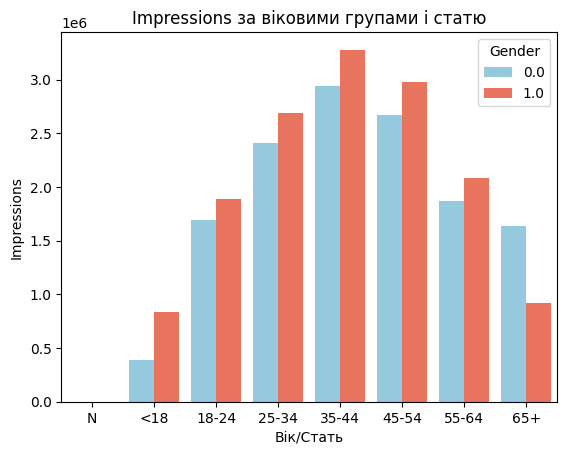

In [33]:
sns.barplot(x='age_group', y='Impressions', hue='Gender', data=days_signed, palette =['skyblue','tomato'])
plt.title('Impressions за віковими групами і статю')
plt.xlabel('Вік/Стать')
plt.ylabel('Impressions')

Text(0, 0.5, 'Clicks')

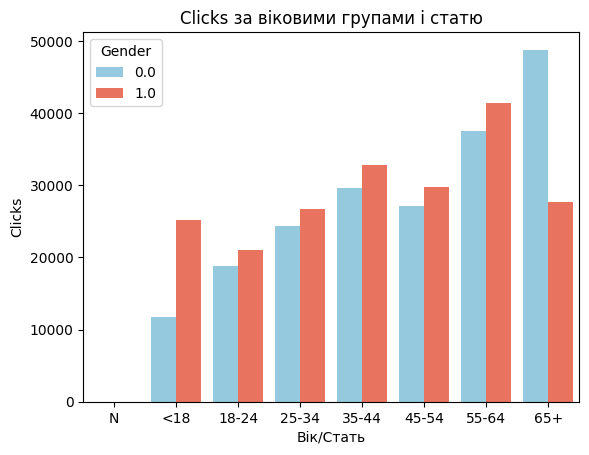

In [34]:
sns.barplot(x='age_group', y='Clicks', hue='Gender', data=days_signed, palette =['skyblue','tomato'])
plt.title('Clicks за віковими групами і статю')
plt.xlabel('Вік/Стать')
plt.ylabel('Clicks')

Text(0, 0.5, 'CTR')

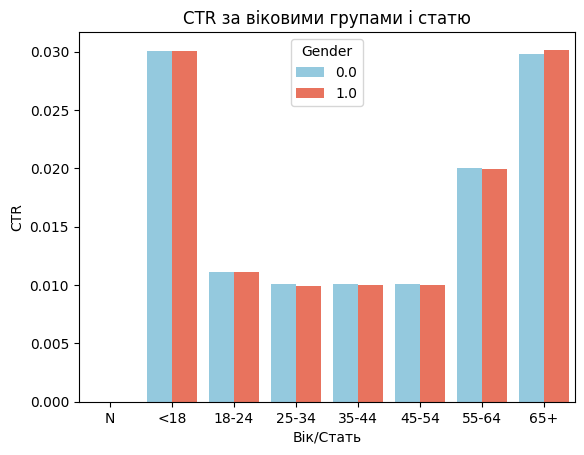

In [35]:
sns.barplot(x='age_group', y='CTR', hue='Gender', data=days_signed, palette =['skyblue','tomato'])
plt.title('CTR за віковими групами і статю')
plt.xlabel('Вік/Стать')
plt.ylabel('CTR')

In [70]:
def calculate_statistics(data):
    stats = {
        'Середнє значення віку': data['Age'].mean(),
        'Медіана віку': data['Age'].median(),
        'Дисперсія кліків': data['Clicks'].var(),
        'Стандартне відхилення кліків': data['Clicks'].std(),
    }
    return pd.Series(stats)

grouped_data = data_signed_in.groupby(['age_group', 'Gender'])
result_data = grouped_data.apply(calculate_statistics).reset_index()

result_data['Impressions'] = grouped_data['Impressions'].sum().reset_index()['Impressions']
result_data['Clicks'] = grouped_data['Clicks'].sum().reset_index()['Clicks']
result_data['CTR'] = result_data['Clicks'] / result_data['Impressions']

result_data.rename(columns={'age_group': 'Вікові групи', 'Gender': 'Стать'}, inplace=True)

age_categories = pd.Categorical(result_data['Вікові групи'], categories=['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'], ordered=True)
result_data['Вікові групи'] = age_categories
result_data = result_data.sort_values(by='Вікові групи').reset_index(drop=True)

result_data

C:\Users\admin\AppData\Local\Temp\ipykernel_6848\3001266007.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data_signed_in.groupby(['age_group', 'Gender'])


,Вікові групи,Стать,Середнє значення віку,Медіана віку,Дисперсія кліків,Стандартне відхилення кліків,Impressions,Clicks,CTR
0,<18,0.0,15.257227,16.0,0.150406,0.387822,390005.0,11734.0,0.030087
1,<18,1.0,15.263071,16.0,0.150262,0.387636,836322.0,25135.0,0.030054
2,18-24,0.0,20.842489,21.0,0.056144,0.236947,1695298.0,18816.0,0.011099
3,18-24,1.0,20.844267,21.0,0.056514,0.237727,1885939.0,21010.0,0.011140
4,25-34,0.0,29.498117,29.0,0.050540,0.224810,2407834.0,24326.0,0.010103
5,25-34,1.0,29.498881,30.0,0.049624,0.222765,2686895.0,26733.0,0.009949
6,35-44,0.0,39.501161,40.0,0.050271,0.224213,2937061.0,29662.0,0.010099
7,35-44,1.0,39.499224,39.0,0.049848,0.223267,3279154.0,32808.0,0.010005
8,45-54,0.0,49.494528,49.0,0.050802,0.225394,2675492.0,27075.0,0.010120
9,45-54,1.0,49.498622,49.0,0.050116,0.223866,2980956.0,29725.0,0.009972
